In [1]:
pip install scikeras

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [3]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [4]:
from sklearn.model_selection import GridSearchCV,KFold
forestfire_data=pd.read_csv("forestfires.csv")
forestfire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


**EDA**

In [5]:
forestfire_data.shape

(517, 31)

In [6]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forestfire_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
forestfire_data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


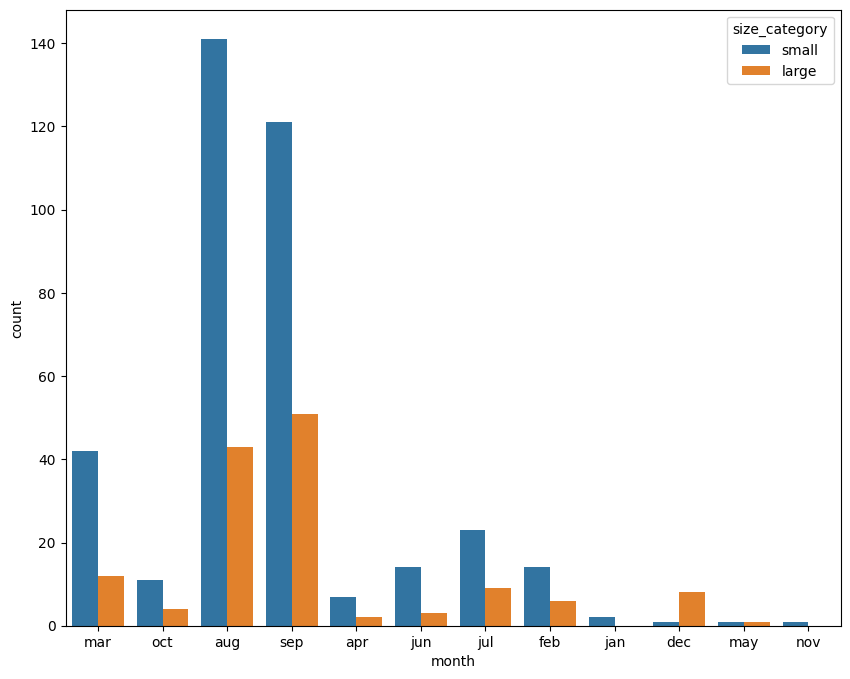

In [9]:
#Visualisation of Data Parameters
plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['month'],hue=forestfire_data['size_category'])
plt.show()

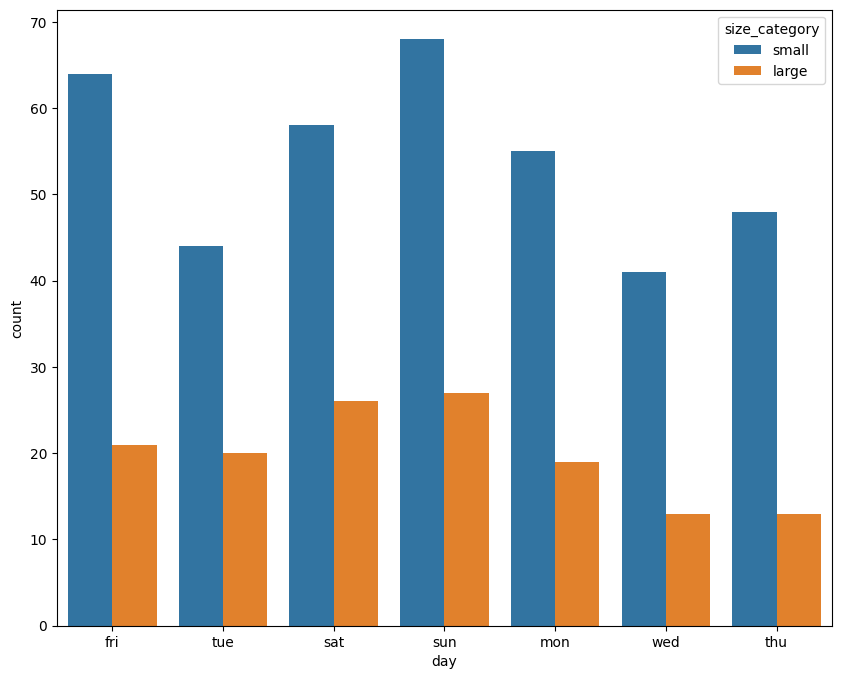

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['day'],hue=forestfire_data['size_category'])
plt.show()

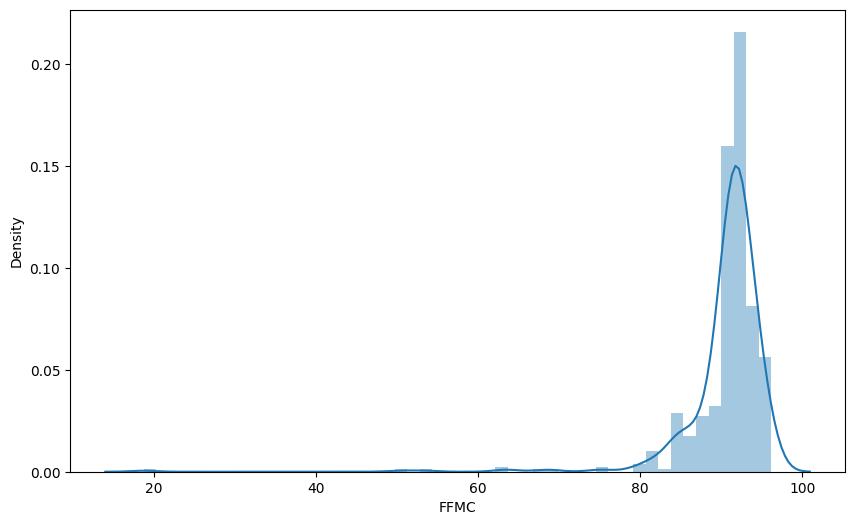

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['FFMC'],)
plt.show()

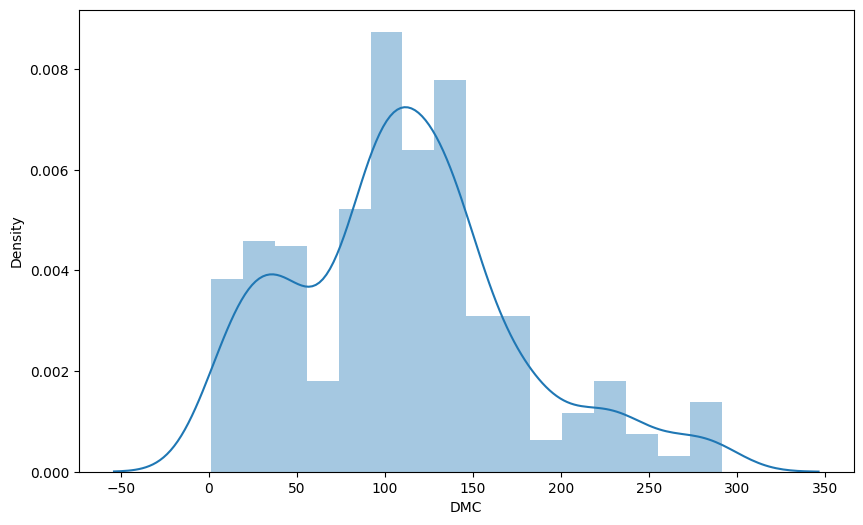

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DMC'],)
plt.show()

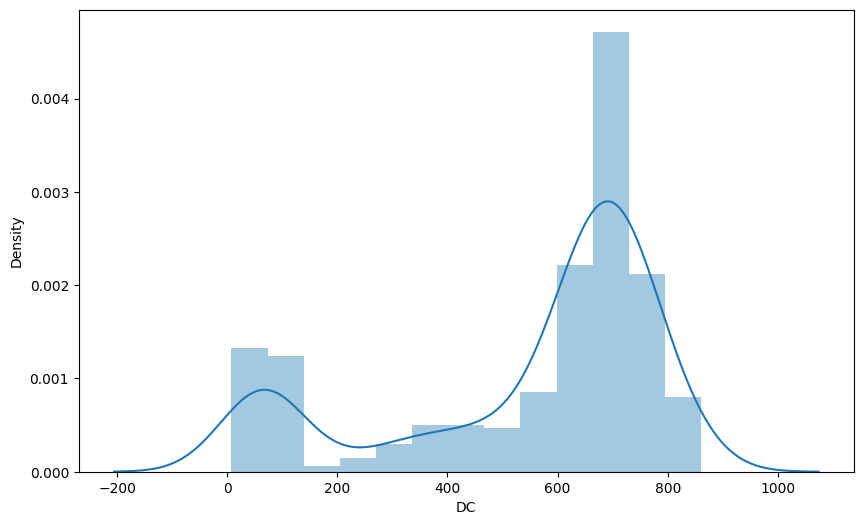

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DC'],)
plt.show()

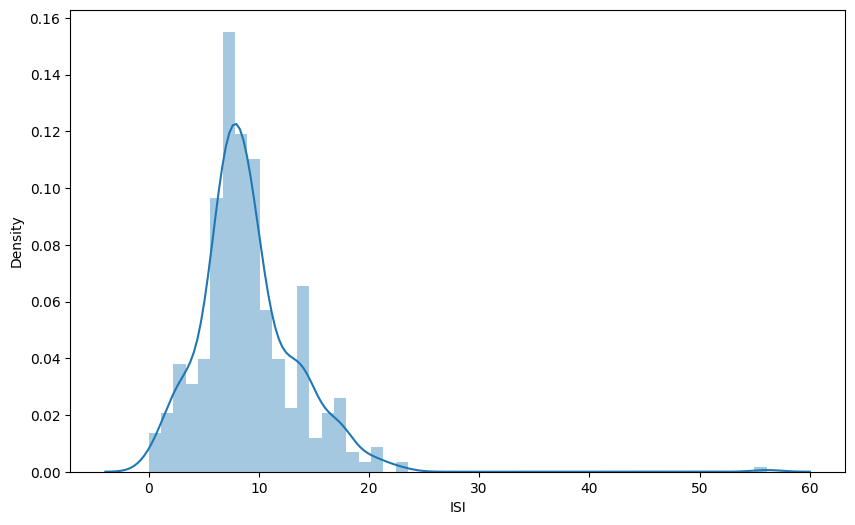

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['ISI'],)
plt.show()

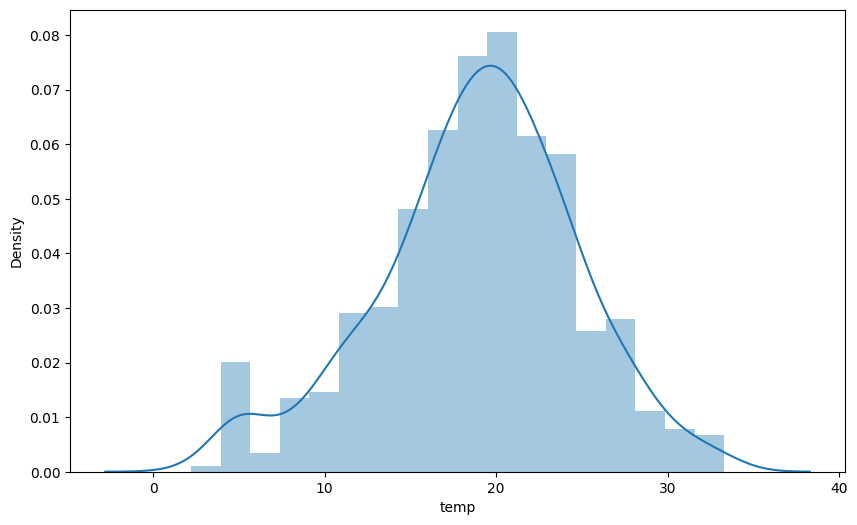

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['temp'],)
plt.show()

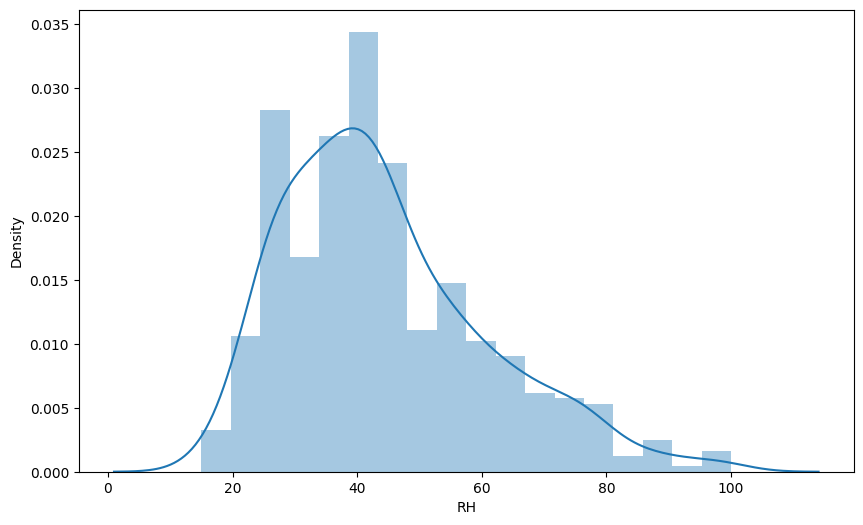

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['RH'],)
plt.show()

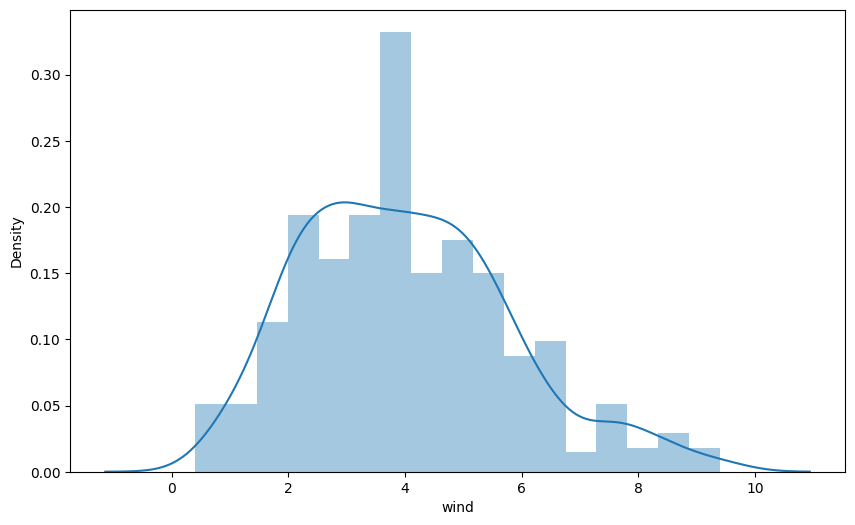

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['wind'],)
plt.show()

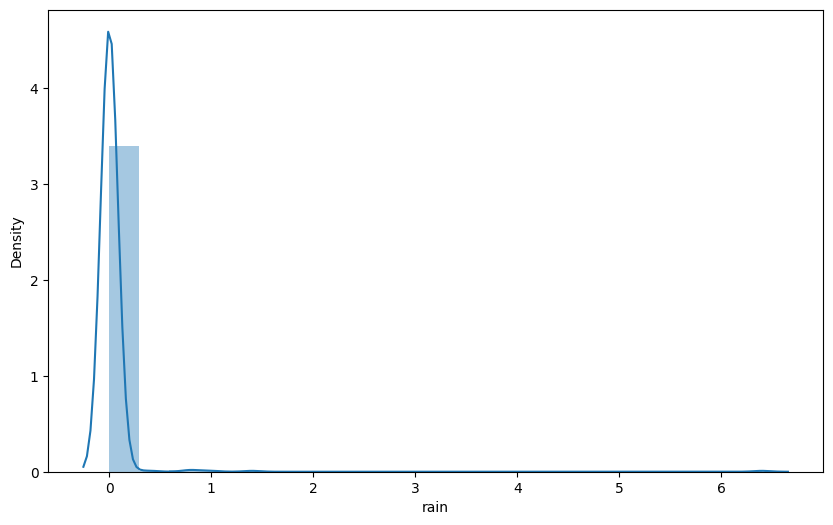

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['rain'],)
plt.show()

In [19]:
drop_data = forestfire_data.drop(labels=['month','day'],axis = 1)
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [20]:
le = LabelEncoder()
drop_data['size_category'] = le.fit_transform(drop_data['size_category'])
drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
drop_data['size_category'].replace({'small':0,'large':0},inplace = True)

In [22]:

drop_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
corr=drop_data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


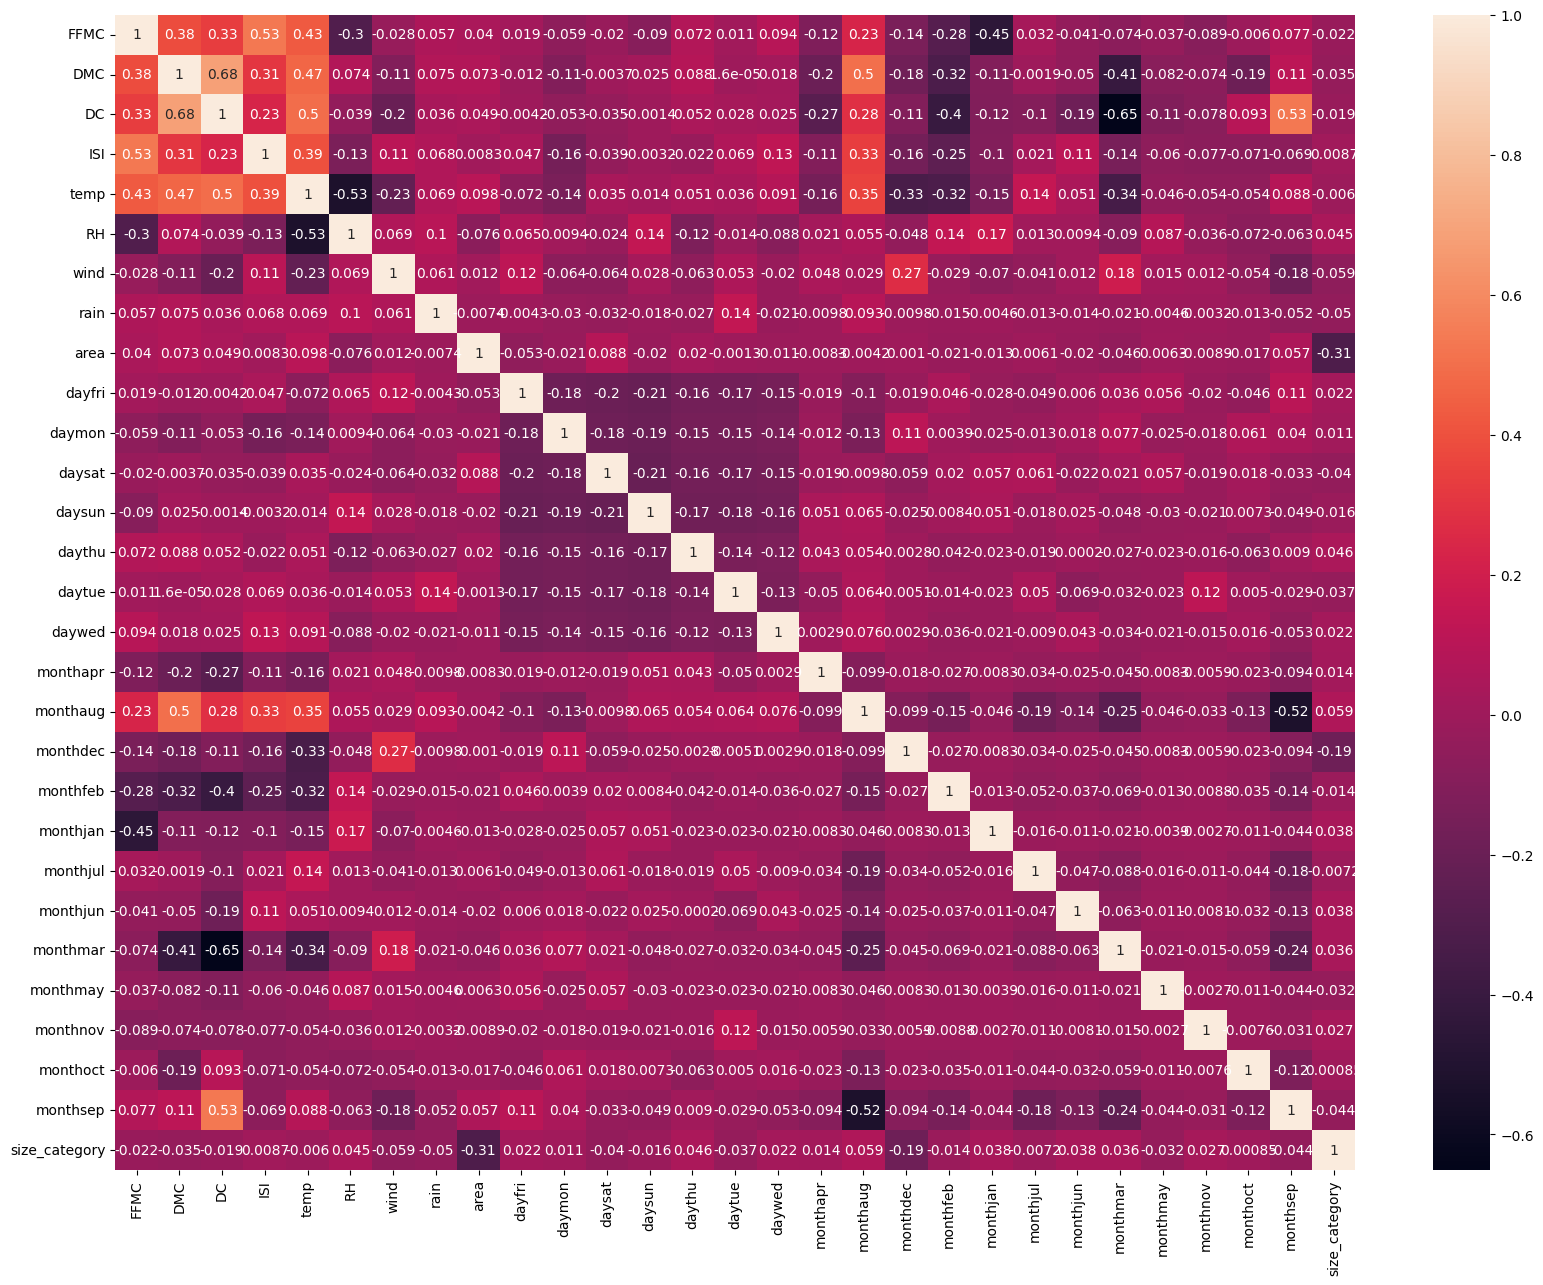

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

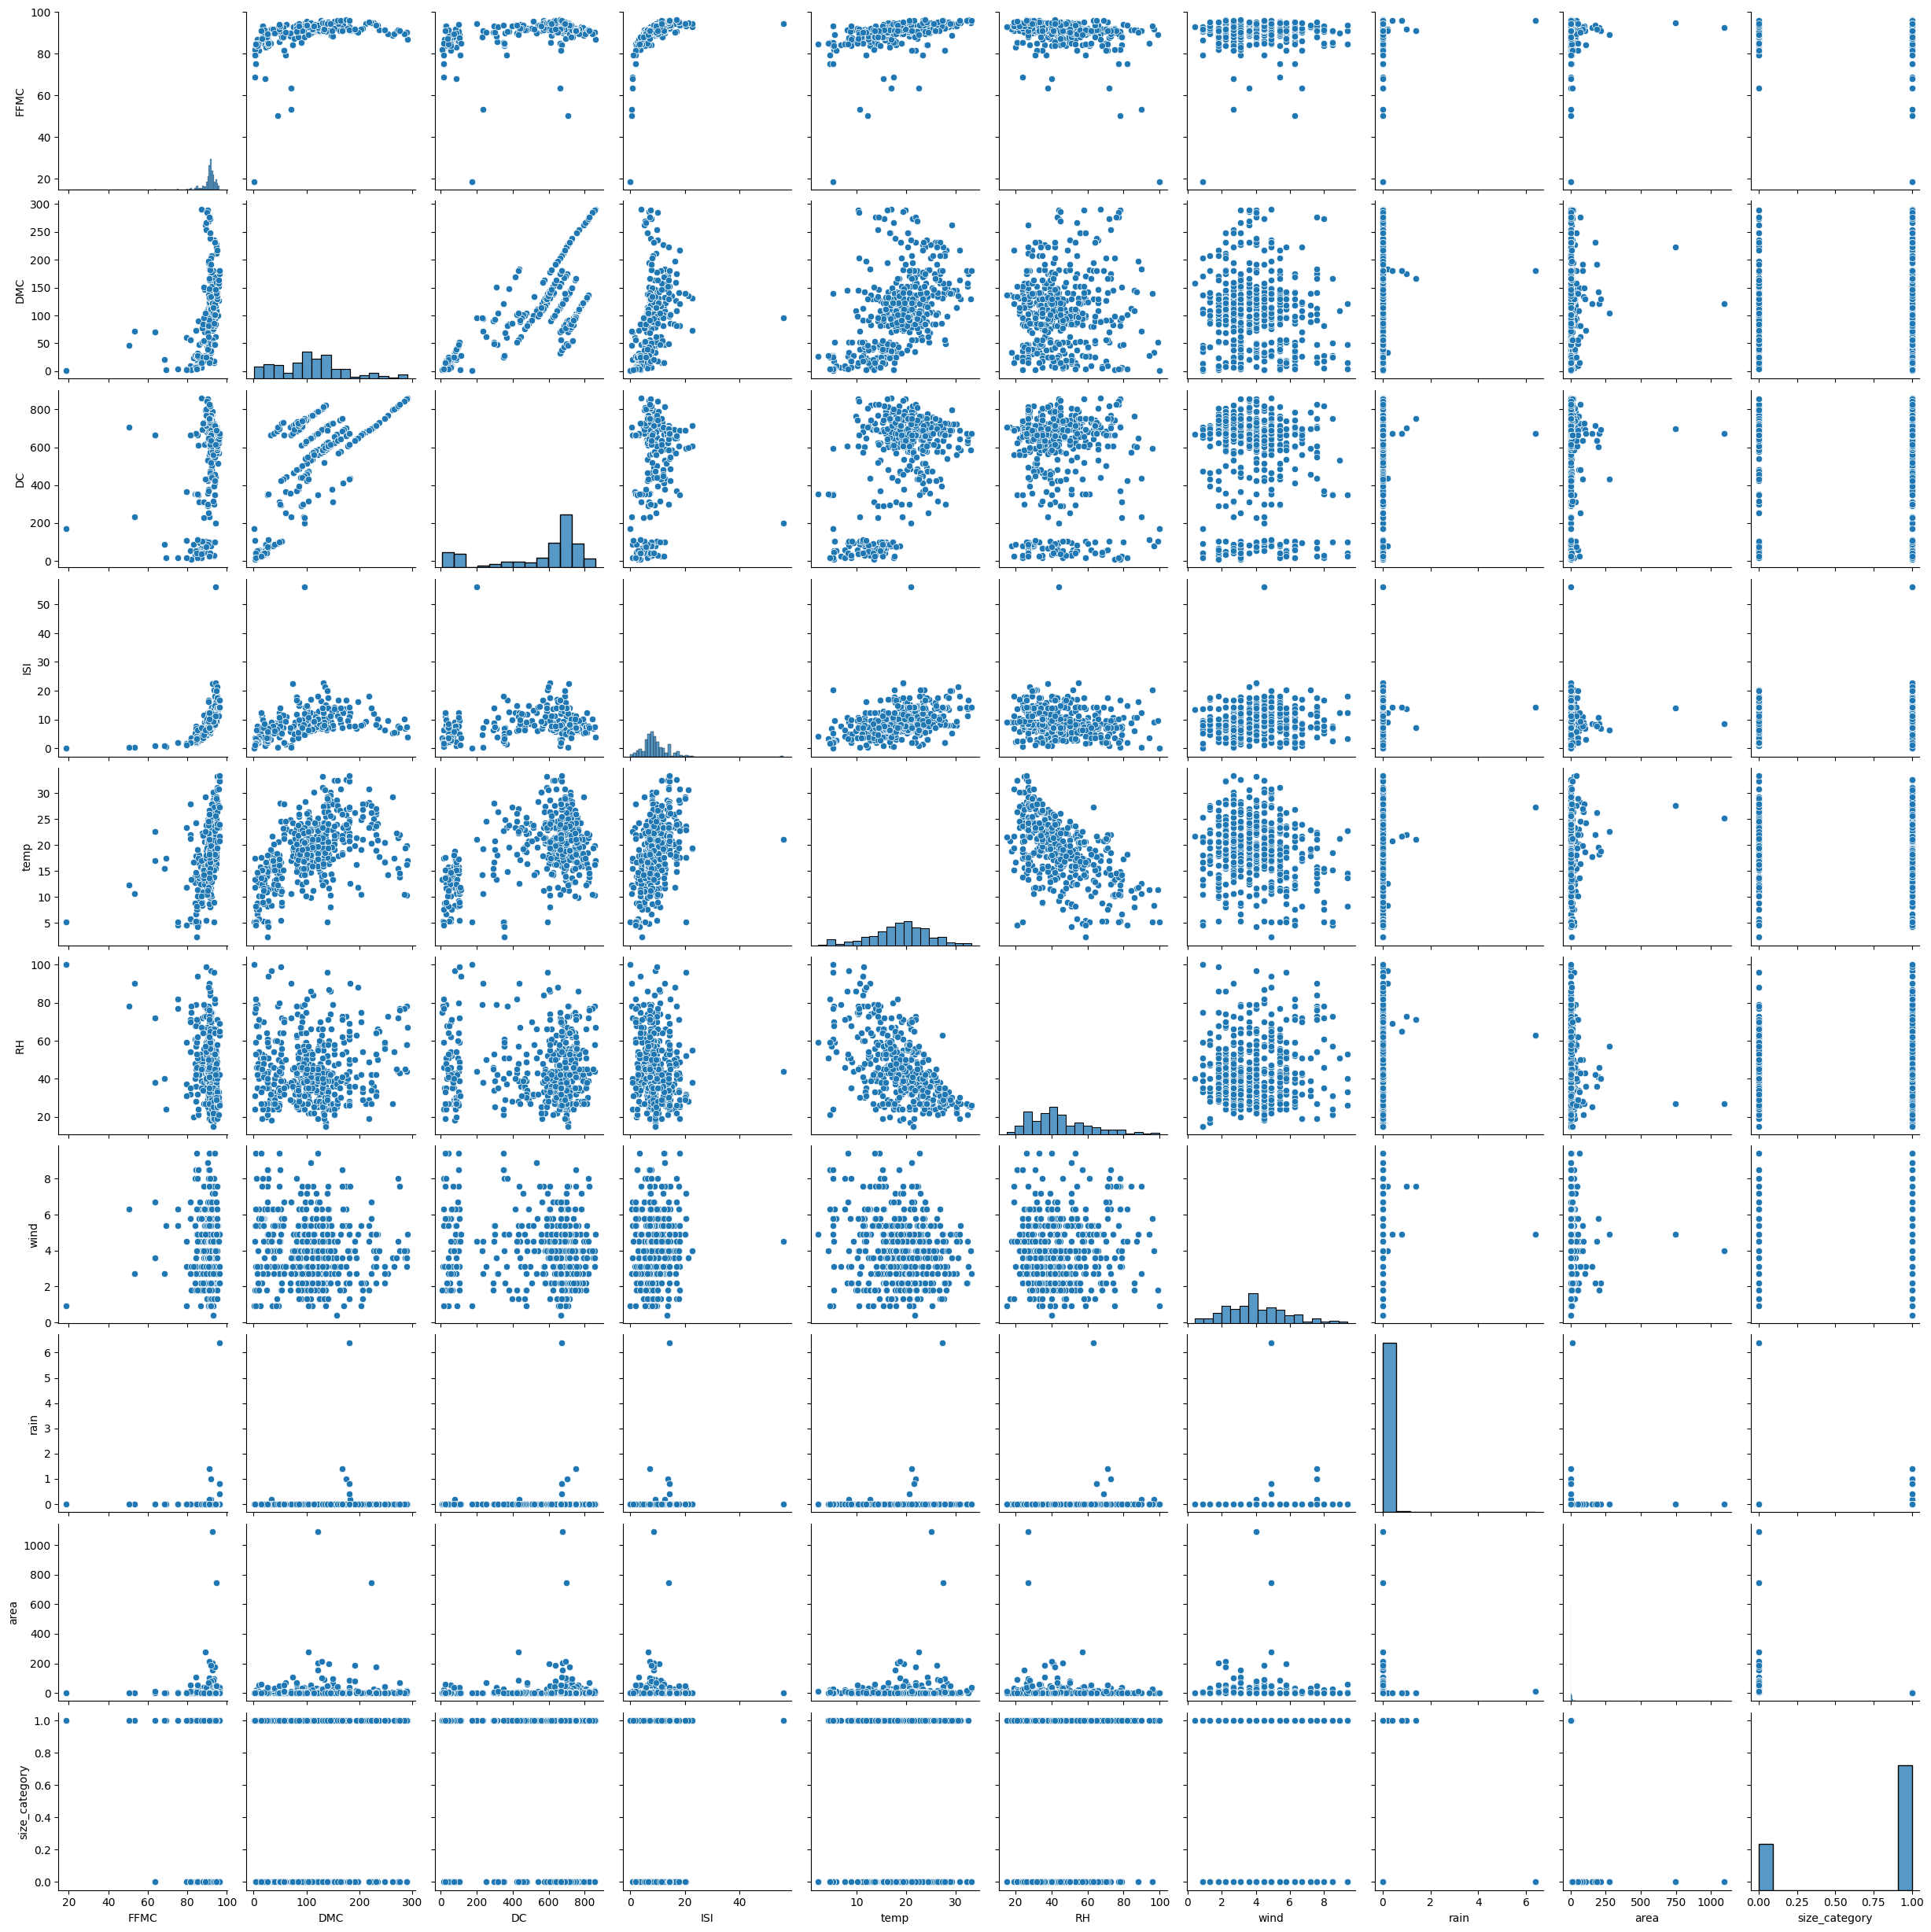

In [25]:
pair_data = pd.concat([drop_data.iloc[:,0:9],drop_data.iloc[:,-1]],axis = 1)
sns.pairplot(pair_data)
plt.show()

**Model Building**

In [26]:
x = drop_data.drop(labels='size_category',axis = 1)
y = drop_data[['size_category']]

In [27]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [29]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)

In [30]:
x_train.shape,y_train.shape

((361, 28), (361, 1))

Data Is Imbalance so i have to balance it , so i m using here smote operation of balancing technique

In [31]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
 534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
 537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   
 
      rain       area  dayfri  ...  monthdec  mont

In [32]:
x_train_sm.shape,y_train_sm.shape

((538, 28), (538,))

In [33]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()


**Convert Data into standard scale **

In [34]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.96774194, 0.34683281, 0.53209818, ..., 0.        , 0.        ,
        0.        ],
       [0.95612903, 0.40809969, 0.91527024, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96954562, 0.27960713, 0.80122036, ..., 0.        , 0.        ,
        1.        ],
       [0.94336113, 0.58192462, 0.73652119, ..., 0.        , 0.        ,
        0.        ],
       [0.97051055, 0.57059336, 0.82401391, ..., 0.        , 0.        ,
        0.        ]])

In [35]:
X_test = scale.fit_transform(x_test)
X_test

array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

**Model Training**

**Tuning of Hyperparameter : Batch size and Epoch**

In [36]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [37]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.787 total time=   2.6s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.667 total time=   2.2s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.546 total time=   2.4s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.869 total time=   2.7s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   2.3s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.769 total time=   3.5s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.704 total time=   3.5s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.778 total time=   4.4s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.757 total time=   3.6s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.617 total time=   3.9s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.852 total time=   6.9s
[CV 2/5] END ..........batch_size=10, epochs=50;,

[CV 4/5] END ..........batch_size=50, epochs=10;, score=0.271 total time=   2.6s


[CV 5/5] END ..........batch_size=50, epochs=10;, score=0.000 total time=   1.2s
[CV 1/5] END ..........batch_size=50, epochs=20;, score=0.574 total time=   1.7s
[CV 2/5] END ..........batch_size=50, epochs=20;, score=0.694 total time=   1.7s
[CV 3/5] END ..........batch_size=50, epochs=20;, score=0.546 total time=   1.7s
[CV 4/5] END ..........batch_size=50, epochs=20;, score=0.346 total time=   2.1s
[CV 5/5] END ..........batch_size=50, epochs=20;, score=0.000 total time=   1.8s
[CV 1/5] END ..........batch_size=50, epochs=50;, score=0.806 total time=   2.3s
[CV 2/5] END ..........batch_size=50, epochs=50;, score=0.694 total time=   1.9s
[CV 3/5] END ..........batch_size=50, epochs=50;, score=0.796 total time=   1.9s
[CV 4/5] END ..........batch_size=50, epochs=50;, score=0.850 total time=   1.9s
[CV 5/5] END ..........batch_size=50, epochs=50;, score=0.000 total time=   2.3s


In [38]:
print(gsv_res.best_params_,gsv_res.best_score_)

{'batch_size': 10, 'epochs': 50} 0.8626514364832122


In [39]:
#Turning Hyperparameter: Learning rate and Dropout rate
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [40]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0,dropout_rate=0.0,learning_rate=0.1)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.213 total time=   4.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.352 total time=   6.1s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.787 total time=   4.4s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.271 total time=   6.2s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   7.2s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.852 total time=   6.1s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.796 total time=   6.3s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.213 total time=   5.4s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.271 total time=   6.3s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.981 total time=   6.3s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.824 total time=   6.1s
[CV 2/5] END dropout_rate=0.0, 

In [41]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8441156109380408


**Tuning of Hyperparameter :Activation Function & Kernel Initializer**

In [42]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [43]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0,Activation_Function='relu',init='zero')
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.815 total time=   4.3s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.750 total time=   6.2s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.815 total time=   5.7s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.860 total time=   4.6s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.907 total time=   6.2s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.833 total time=   4.5s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.778 total time=   6.1s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.833 total time=   6.4s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.850 total time=   6.1s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.963 total time=   5.9s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.824 total time=   4.3s
[CV 2/5] END Activat

In [44]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.8515057113187954 {'Activation_Function': 'relu', 'init': 'uniform'}


**Tuning of Hyperparameter :Number of Neurons in hidden layer**

In [45]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [46]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0,neuron1=24,neuron2=12)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.870 total time=   6.1s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.806 total time=   5.0s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.861 total time=   4.3s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.897 total time=   6.2s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.972 total time=   4.6s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.870 total time=   4.4s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.796 total time=   5.7s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.833 total time=   4.3s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.888 total time=   4.6s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.963 total time=   6.1s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.870 total time=   4.3s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [47]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.8886119764624437 {'neuron1': 16, 'neuron2': 8}


**Train a model with optimum values of hyperparameter**

In [48]:
# best Parameters
# batch_size = 10
# epochs = 50
# dropout_rate = 0.1
# learning rate = 0.001
# activation_function = tanh
# kernel_initiative = normal
# neuron1 = 8
# neuron2 = 8

In [49]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [50]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train)

Epoch 1/50
54/54 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.6245
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.6877
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.7361
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7695
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7862
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.8141
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.8271
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8197
Epoch 10/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8216
Epoch 11/50
54/54 [

KerasClassifier(
	model=None
	build_fn=<function creat_model at 0x7c07437c24d0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [51]:
y_predict = model.predict(X_train)

54/54 [==============================] - 0s 1ms/step


In [52]:
accuracy_score(y_train,y_predict)

0.9330855018587361

In [53]:
confusion_matrix(y_train,y_predict)

array([[233,  36],
       [  0, 269]])

In [54]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       269
           1       0.88      1.00      0.94       269

    accuracy                           0.93       538
   macro avg       0.94      0.93      0.93       538
weighted avg       0.94      0.93      0.93       538



In [55]:
# testing data
y_test_pred = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [56]:
accuracy_score(y_test,y_test_pred)

0.8076923076923077

In [57]:
confusion_matrix(y_test,y_test_pred)

array([[45,  2],
       [28, 81]])

In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75        47
           1       0.98      0.74      0.84       109

    accuracy                           0.81       156
   macro avg       0.80      0.85      0.80       156
weighted avg       0.87      0.81      0.82       156



**Here we create model by using optimum value of hyperparameter it gives a approximately 80% accuracy score**